# Lista de Exercício 07
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 1 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_7.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`

# 1) Rede Neural Convolucional (CNN)

Este exercício demonstra o treinamento de uma Rede Neural Convolucional (CNN) simples para classificar imagens de um banco de dados chamado [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). Utilizaremos uma biblioteca chamada [Keras](https://www.tensorflow.org/guide/keras/overview) para criar e treinar o modelo.

**Referências:**

*   Tensorflow  - [CNN](https://www.tensorflow.org/tutorials/images/cnn)
*   Tensorflow  - [Image classification](https://www.tensorflow.org/tutorials/keras/classification#build_the_model)

Vamos importar as bibliotecas que iremos utilizar para a rede neural:

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

#bibliotecas para Cluster Analysis
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans

2023-12-06 14:04:39.558054: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 14:04:40.161406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 14:04:40.161556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 14:04:40.266669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 14:04:40.477100: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-06 14:04:40.480449: I tensorflow/core/platform/cpu_feature_guard.cc:1

## 1.1) DATASET

O conjunto de dados (*dataset*) Fashion MNIST contém 70.000 imagens grayscale de 10 classes, conforme mostrado na Tabela 2. O conjunto de dados é dividido em 60.000 imagens de treinamento e 10.000 imagens de teste.

<center><figcaption><b> Tabela 2: </b> Classes e seus respectivos rótulos.</b></figcaption>
</figure>

| Classe          | Rotulo (label) |
|-----------------|----------------|
| T-shirt/top     |        0       |
| Trouser         |        1       |
| Pullover        |        2       |
| Dress           |        3       |
| Coat            |        4       |
| Sandal          |        5       |
| Shirt           |        6       |
| Sneaker         |        7       |
| Bag             |        8       |
| Ankle Boot      |        9       |
</center>

**Exercício:**

* Mostre o formato, o tipo e valores máximo e mínimo das variáveis train_images e train_labels. Plote uma imagem qualquer e coloque em seu título o respectivo label.

* Mostre o formato, o tipo e valores máximo e mínimo das variáveis test_images e test_labels. Plote uma imagem qualquer e coloque em seu título o respectivo label.

O formato do dataset train_images é (60000, 28, 28)
O tipo das variáveis do train_images é uint8
O valor mínimo do dataset train_images é 0 e o máximo é 255

O formato do dataset train_images é (60000,)
O tipo das variáveis do train_images é uint8
O valor mínimo do dataset train_images é 0 e o máximo é 9

O formato do dataset test_images é (10000, 28, 28)
O tipo das variáveis do test_images é uint8
O valor mínimo do dataset test_images é 0 e o máximo é 255

O formato do dataset train_images é (10000,)
O tipo das variáveis do train_images é uint8
O valor mínimo do dataset train_images é 0 e o máximo é 9



[]

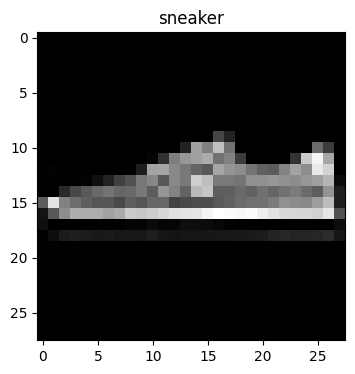

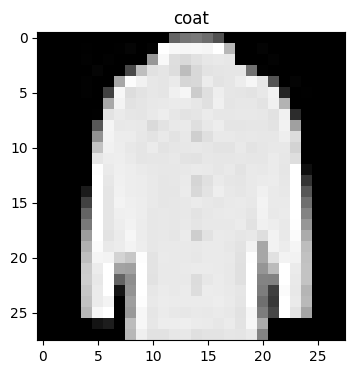

In [14]:
# Matriz contendo os rótulos, em ordem, conforme Tabela 2
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# Carrega a base de dados FASHION_MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

## -- Seu código começa AQUI -- ##
# Mostrando as grandezas do train_images
print(f'O formato do dataset train_images é {train_images.shape}')
print(f'O tipo das variáveis do train_images é {train_images.dtype}')
print(f'O valor mínimo do dataset train_images é {train_images.min()} e o máximo é {train_images.max()}')
print()
# Mostrando as grandezas do train_labels
print(f'O formato do dataset train_images é {train_labels.shape}')
print(f'O tipo das variáveis do train_images é {train_labels.dtype}')
print(f'O valor mínimo do dataset train_images é {train_labels.min()} e o máximo é {train_labels.max()}')
print()

# Mostrando uma imagem
num = 14
img = train_images[num]
label_index = train_labels[num]

label = class_names[label_index]

plt.figure(figsize=(4,4))
plt.title(label)
plt.imshow(img, cmap='gray')
plt.plot()

# Mostrando as grandezas do test_images
print(f'O formato do dataset test_images é {test_images.shape}')
print(f'O tipo das variáveis do test_images é {test_images.dtype}')
print(f'O valor mínimo do dataset test_images é {test_images.min()} e o máximo é {test_images.max()}')
print()
# Mostrando as grandezas do train_labels
print(f'O formato do dataset train_images é {test_labels.shape}')
print(f'O tipo das variáveis do train_images é {test_labels.dtype}')
print(f'O valor mínimo do dataset train_images é {test_labels.min()} e o máximo é {test_labels.max()}')
print()

# Mostrando uma imagem
num = 14
img_2 = test_images[num]
label_index = test_labels[num]

label = class_names[label_index]

plt.figure(figsize=(4,4))
plt.title(label)
plt.imshow(img_2, cmap='gray')
plt.plot()
## -- Seu código termina AQUI -- ##

#### *Inspeção do dataset*

Vamos inspecionar as 25 primeiras imagens do conjunto de treinamento.

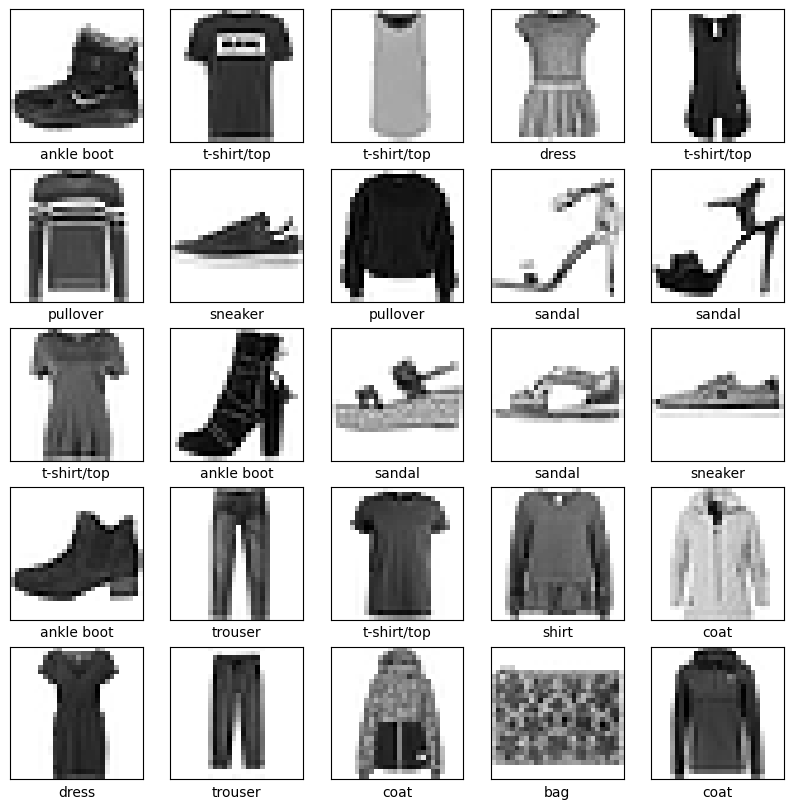

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 1.2) MODELO

Podemos construir um modelo utilizando blocos da biblioteca Keras importada logo no início deste notebook. A construção é sequencial, ou seja, vamos adicionando camadas (layers) ao modelo. Existem diversos tipos de camadas, com funções diversas. Vamos usar aqui as camadas de convolução, de pooling, de achatamento e densa. Repare que todas estas, exceto a camada de pooling, tem seus pesos ajustados durante o treinamento. O desafio é encontrar uma combinação de camadas (arquitetura) que torne a generalização do seu modelo eficiente.

Vamos criar dois modelos diferentes de classificadores para entender o efeito da arquitetura no resultado. Queremos que a rede aprenda a diferenciar dentre as 10 classes do dataset importado anteriomente.

A função a seguir constrói o modelo conforme os parâmetros de entrada, sendo:

* `input_shape`: formato dos dados de entrada
* `n_classes`: número de classes de saída
* `n_filtros_conv`: lista 1D contendo o número de filtros a serem utilizados na camada de convolução. Note que o tamanho desta matriz vai ditar quantas camadas deste tipo devem ser adicionadas ao modelo. Fixamos o tamanho do kernel do filtro em 3.
* `n_filtros_dense`: lista 1D contendo o número de neurônios a serem utilizados na camada densa. Note que o tamanho desta matriz vai ditar quantas camadas deste tipo devem ser adicionadas ao modelo.

In [16]:
def build_model(input_shape, n_classes, n_filtros_conv, n_filtros_dense):
  '''
  layers.Conv2D       -> Camada de convolução
  layers.MaxPooling2D -> Camada de "pooling"
  layers.Flatten      -> Camada de achatamento
  layers.Dense        -> Camada de neurônios
  '''

  kernel_size = 3

  modelo = models.Sequential()

  for idx, filtro in enumerate(n_filtros_conv):
    if idx == 0:
       modelo.add(layers.Conv2D(filtro, kernel_size, activation='relu', input_shape=(input_shape[0],input_shape[1],1)))
       modelo.add(layers.MaxPooling2D((2, 2)))
    elif idx == len(n_filtros_conv)-1:
       modelo.add(layers.Conv2D(filtro, kernel_size, activation='relu'))
    else:
       modelo.add(layers.Conv2D(filtro, kernel_size, activation='relu'))
       modelo.add(layers.MaxPooling2D((2, 2)))

  modelo.add(layers.Flatten())

  if len(n_filtros_dense) == 0:
    modelo.add(layers.Dense(n_classes))
  else:
    for idx, filtro in enumerate(n_filtros_dense):
      if idx == len(n_filtros_dense)-1:
        modelo.add(layers.Dense(n_classes))
      else:
        modelo.add(layers.Dense(filtro, activation='relu'))

  modelo.summary()

  return modelo

**Exercício - modelo_1:**

Utilizando a função dada acima, construa o primeiro modelo e o atribua a uma variável chamada `modelo_1`. Utilize as informações do dataset importado para configurar os parâmetros da função.

Neste modelo, utilizaremos apenas 1 camada de convolução com 4 filtros e 1 camada densa com 32 neurônios.

Em seguida, o modelo deve ser compilado. Como loss, utilizaremos a entropia cruzada (com otimizador Adam) e a métrica a ser usada na avaliação será a acurácia.

In [17]:
# Número de classes para classificar
n_classes = 10
# Formato da imagem que sera input da rede
input_shape = (28,28)

# Número de filtros em cada camada de convolução
n_filtros_conv = [4]
# Número de filtros dense
n_filtros_dense = [32]

modelo_1 = build_model(input_shape, n_classes, n_filtros_conv, n_filtros_dense)

# Compila o modelo com o otimizador Adam,
# função de perda Sparse Categorical Crossentropy e
# monitora o modelo através da acurácia
modelo_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Modelo 1 compilado!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 4)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Modelo 1 compilado!


**Exercício - modelo_2:**

Agora construa o segundo modelo e o atribua a uma variável chamada `modelo_2`. Utilize as mesmas informações da dataset importado para configurar os parâmetros da função.

Neste modelo, utilizaremos 3 camadas de convolução com 16, 32 e 32 filtros e 3 camadas densas com 64 neurônios cada uma. Em seguida, o modelo deve ser compilado. Como loss, utilizaremos a entropia cruzada (com otimizador Adam) e a métrica a ser usada na avaliação será a acurácia.

In [18]:

n_filtros_conv = [32,64,64]
n_filtros_dense = [64,64,128]

modelo_2 = build_model(input_shape, n_classes, n_filtros_conv, n_filtros_dense)

modelo_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print("Modelo 2 compilado!")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

## 1.3) TREINAMENTO

Vamos realizar o treinamento dos dois modelos criados durante 50 épocas. Uma época significa que todas as amostras do dataset passaram pela rede. Para avaliarmos como anda o treinamento, precisamos calcular uma métrica a cada época - validação. Para isso, vamos separar 10% do dataset de treinamento para este subset. Na função `fit` existe esta opção disponível.  

`metricas = modelo.fit(images, lavels, epochs, validation_split=0.1)`

**Exercício:**

Complete o código a seguir para prosseguir com o treinamento de ambos os modelos (separadamente), conforme orientação acima. No final de cada treinamento serão plotados os gráficos de loss e acurácia tanto do treinamento quanto da validação.

Epoch 1/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2944 - accuracy: 0.8914 - val_loss: 0.3662 - val_accuracy: 0.8778
Epoch 2/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2946 - accuracy: 0.8916 - val_loss: 0.3931 - val_accuracy: 0.8698
Epoch 3/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2937 - accuracy: 0.8912 - val_loss: 0.3666 - val_accuracy: 0.8828
Epoch 4/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2955 - accuracy: 0.8912 - val_loss: 0.3521 - val_accuracy: 0.8817
Epoch 5/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2994 - accuracy: 0.8895 - val_loss: 0.3794 - val_accuracy: 0.8747
Epoch 6/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2947 - accuracy: 0.8911 - val_loss: 0.3893 - val_accuracy: 0.8793
Epoch 7/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2961 - accuracy: 0.8907 - val_loss: 0.3665 - val_ac

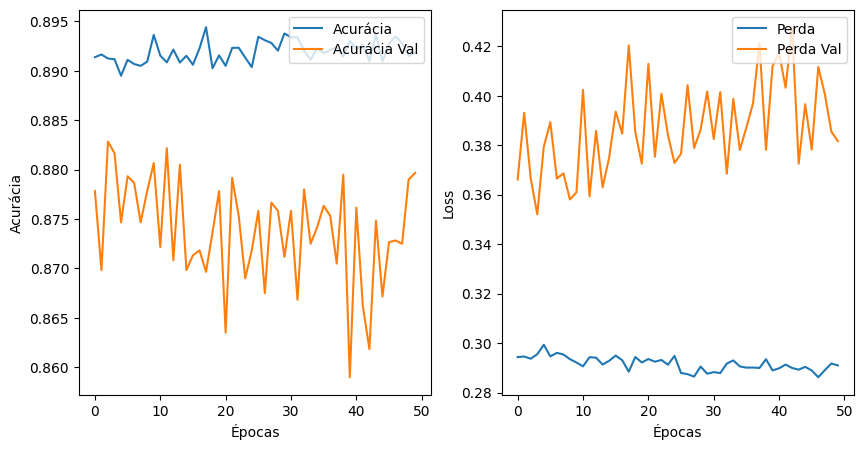

In [25]:

## --- MODELO 1 ---

## -- Seu código começa AQUI -- ##

n_epochs = 50

metricas = modelo_1.fit(train_images, train_labels, epochs=n_epochs, validation_split=0.1)

## -- Seu código termina AQUI -- ##
print(metricas.history['val_accuracy'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(metricas.history['accuracy'], label='Acurácia')
plt.plot(metricas.history['val_accuracy'], label='Acurácia Val')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(metricas.history['loss'], label='Perda')
plt.plot(metricas.history['val_loss'], label='Perda Val')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(loc='upper right')


Epoch 1/50
1688/1688 [==============================] - 30s 17ms/step - loss: 0.3615 - accuracy: 0.8691 - val_loss: 0.3319 - val_accuracy: 0.8797
Epoch 2/50
1688/1688 [==============================] - 29s 17ms/step - loss: 0.3154 - accuracy: 0.8833 - val_loss: 0.3201 - val_accuracy: 0.8783
Epoch 3/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.2857 - accuracy: 0.8961 - val_loss: 0.2973 - val_accuracy: 0.8898
Epoch 4/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.2658 - accuracy: 0.9026 - val_loss: 0.2970 - val_accuracy: 0.8960
Epoch 5/50
1688/1688 [==============================] - 28s 17ms/step - loss: 0.2463 - accuracy: 0.9085 - val_loss: 0.2977 - val_accuracy: 0.8938
Epoch 6/50
1688/1688 [==============================] - 29s 17ms/step - loss: 0.2292 - accuracy: 0.9148 - val_loss: 0.3027 - val_accuracy: 0.8952
Epoch 7/50
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2140 - accuracy: 0.9203 - val_loss: 0.3092 -

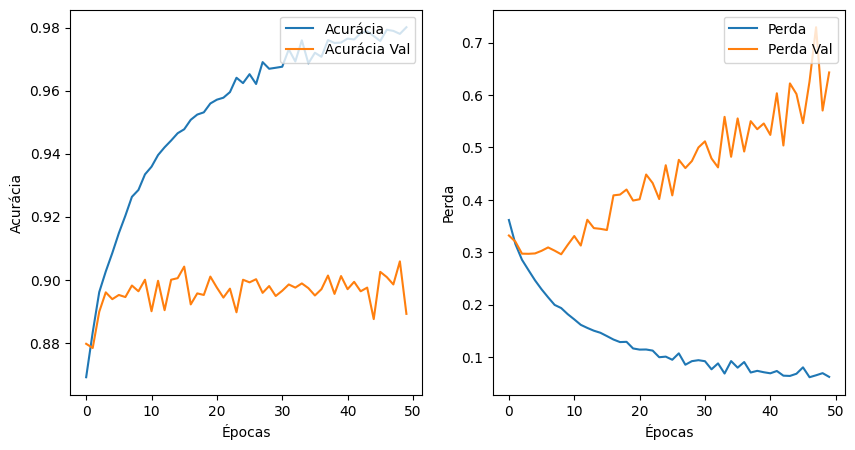

In [23]:

## --- MODELO 2 ---

## -- Seu código começa AQUI -- ##

n_epochs = 50

metricas = modelo_2.fit(train_images, train_labels, epochs=n_epochs, validation_split=0.1)

## -- Seu código termina AQUI -- ##

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(metricas.history['accuracy'], label='Acurácia')
plt.plot(metricas.history['val_accuracy'], label='Acurácia Val')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(metricas.history['loss'], label='Perda')
plt.plot(metricas.history['val_loss'], label='Perda Val')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(loc='upper right')

**Exercício:**

* Com base nos gráficos mostrados acima, qual modelo você escolheria para utilizar? Justifique o motivo. [Aqui](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit) você pode encontrar mais informações sobre como analisar os resultados do treinamento.

In [ ]:
## RESPOSTA:

# O segundo modelo, apesar de levar muito mais tempo para ser treinado por possuir 
# muito mais parâmetros treináveis, tem acurácia final de 98%, enquanto a acurácia do modelo 1
# é de apenas 89%, dessa forma, o modelo 2 é o ideal para ser utilizado.

## 1.4) TESTE

Utilizando o modelo escolhido (modelo_1 ou modelo_2), verifique a acurácia do modelo a respeito do dataset de teste. Para isso, podemos usar uma função da biblioteca também já disponibilizada `model.evaluate()`. Ela retorna os valores de loss e acurácia para o dataset utilizado. Utilize todo o dataset de teste para esta avaliação.

`loss, acc = model.evaluate(images, labels)`

In [26]:
## -- Seu código começa AQUI -- ##
loss, acc = modelo_2.evaluate(test_images, test_labels)
## -- Seu código termina AQUI -- ##

313/313 [==============================] - 2s 5ms/step - loss: 0.7187 - accuracy: 0.8904


Com o modelo treinado, você pode usá-lo para fazer previsões sobre algumas imagens. Para isso, vamos utilizar o método `model.predict`. O modelo tem como saída, dados do tipo [logits](https://developers.google.com/machine-learning/glossary#logits). Para transformar esses dados em probabilidades, anexe uma camada [softmax](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax), que são mais fáceis de interpretar.

1/1 [==============================] - 0s 98ms/step
Cu


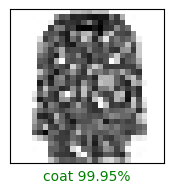

In [28]:
#@title Escolha uma imagem para a previsão { run: "auto" }

# Configure aqui o modelo escolhido (modelo_1 ou modelo_2)
modelo = modelo_2

imgIndex = 5304 #@param {type:"slider", min:0, max:9999, step:1}

imgInput = test_images[imgIndex:imgIndex+1,:]

# Anexa uma camada softmax
modelo_probabilidade = tf.keras.Sequential([modelo, tf.keras.layers.Softmax()])

# Faz a previsao
probs = modelo_probabilidade.predict(imgInput)

# Encontra qual o índice com a maior probabilidade
classe_pred = np.argmax(probs)

# Mostra a figura
plt.figure(figsize=(2,2))
plt.imshow(imgInput[0,:], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
string = class_names[classe_pred] + " {:.2f}%".format(probs[0,classe_pred] *100)


# A imagem foi classificada corretamente?
if class_names[test_labels[imgIndex]] == class_names[classe_pred]:
  # Se sim, mostre a legenda como verde
  plt.xlabel(string ,color='green')
else:
  # Se nao, mostre a legenda como vermelha
  plt.xlabel(string,color='red')
  print("O correto seria: ", class_names[test_labels[imgIndex]])
